In [2]:
# 사이킷런은 머신러닝(일반적으로 정형데이터분석)에 특화모듈
# 하지만 딥러닝에서도 훈련,테스트 데이터 나누기, 결과에 대한 평가등은 사이킷런 모듈을 사용함
#사이킷런은 콘다는 scikit-learn,파이썬은 sklearn

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [11]:
# 랜덤한 고객 데이터 생성 (가상의 예제)
import pandas as pd
import numpy as np
np.random.seed(42)
age = np.array([25,30,35,40,45,50,55,60,65,70])
purchase_amount = np.array([100,120,80,60,90,75,110,95,130,105])

data=pd.DataFrame({'나이':age,
                   '금액':purchase_amount})
data.head()

,나이,금액
0,25,100
1,30,120
2,35,80
3,40,60
4,45,90


In [12]:
data=data.values
data

array([[ 25, 100],
       [ 30, 120],
       [ 35,  80],
       [ 40,  60],
       [ 45,  90],
       [ 50,  75],
       [ 55, 110],
       [ 60,  95],
       [ 65, 130],
       [ 70, 105]])

In [18]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(data)

labels = kmeans.labels_

centers = kmeans.cluster_centers_
centers

c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[ 27.5 , 110.  ],
       [ 42.5 ,  76.25],
       [ 62.5 , 110.  ]])

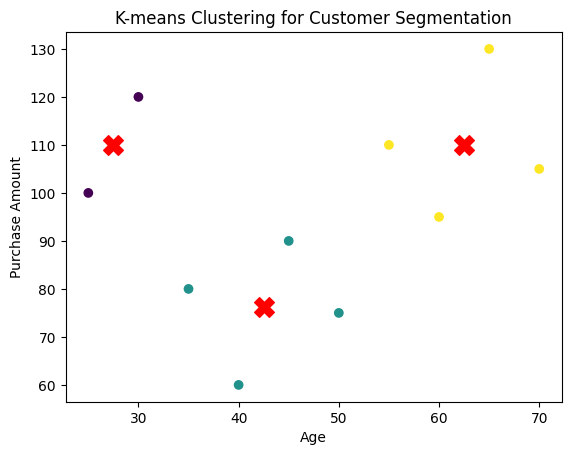

In [19]:
# 결과 시각화
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red')
plt.title('K-means Clustering for Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: K

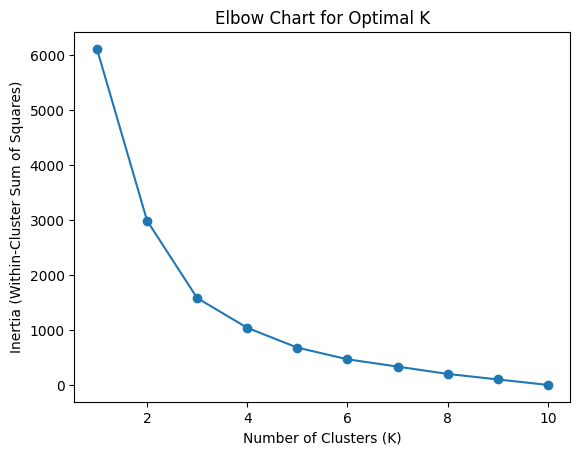

In [22]:
# 클러스터 수 범위 정의
k_values = range(1, 11)
inertia_values = []

# 각 클러스터 수에 대한 KMeans 모델 생성 및 훈련
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# 엘보우 차트 시각화
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Chart for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()